<a href="https://colab.research.google.com/github/HUMBERTOMC/HUMBERTOMC/blob/main/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# Carregando os dados para um dataframe no pandas
df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/20220823 Extracao para SIC Compilado.xlsx')
dfAtivos = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/servidores_ativos.xlsx')

# Extraíndo a coluna ano da 'dh_criacao'
df['Year'] = pd.DatetimeIndex(df['dh_criacao']).year



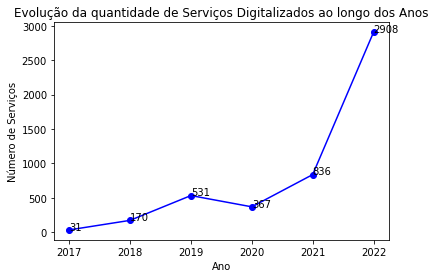

In [ ]:
# Obtenha a quantidade de serviços digitalizados por ano
services_per_year = df.groupby(['Year'])['servico_nome'].count()

# Gerando o gráfico com a quantidade de serviços digitalizados por ano
plt.plot(services_per_year.index, services_per_year.values, color='blue', marker='o')
plt.xlabel("Ano")
plt.ylabel("Número de Serviços")
plt.title("Evolução da quantidade de Serviços Digitalizados ao longo dos Anos")

for i, year in enumerate(services_per_year.index):
  plt.text(year, services_per_year.values[i], str(services_per_year.values[i]))

plt.show()



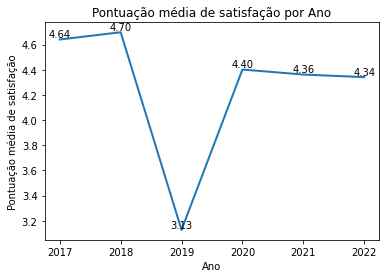

In [ ]:
# Calculando a pontuação média de satisfação por ano
mean_satisfaction = df.groupby("Year")["satisfacao_media_anual"].mean()

# Gerando o gráfico com a pontuação média de satisfação por ano
plt.plot(mean_satisfaction, linewidth=2)
plt.xlabel("Ano")
plt.ylabel("Pontuação média de satisfação")
plt.title("Pontuação média de satisfação por Ano")
for year, score in mean_satisfaction.items():
  plt.text(year, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()

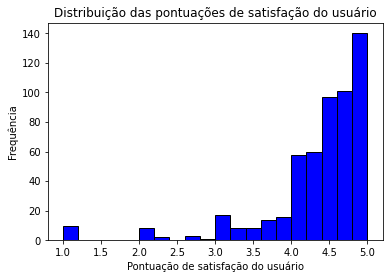

In [ ]:
# Plote o histograma das pontuações de satisfação do usuário
plt.hist(df["satisfacao_media_anual"], bins=20, color='blue', edgecolor='black')
plt.xlabel("Pontuação de satisfação do usuário")
plt.ylabel("Frequência")
plt.title("Distribuição das pontuações de satisfação do usuário")
plt.show()



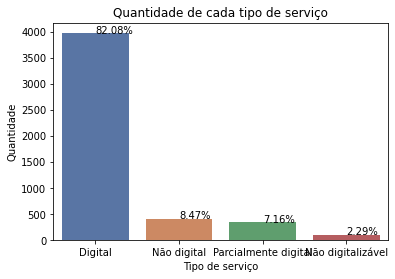

In [ ]:
#Contar a quantidade de valores únicos na coluna "tipo"
tipo_counts = df['servico_digitalizavel'].value_counts()

#Calcular o percentual de cada tipo
percentual = (tipo_counts / tipo_counts.sum()) * 100

#Plotar o gráfico de barras usando o Seaborn
sns.barplot(x=tipo_counts.index, y=tipo_counts.values, palette='deep')

#Adicionar rótulos ao eixo x e y
plt.xlabel("Tipo de serviço")
plt.ylabel("Quantidade")

#Adicionar título ao gráfico
plt.title("Quantidade de cada tipo de serviço")

#Adicionar legenda com o percentual de cada tipo
for i in range(len(tipo_counts)):
  plt.text(x = i, y = tipo_counts[i]+0.5, s = str(round(percentual[i], 2))+"%", size = 10)

#Exibir o gráfico
plt.show()

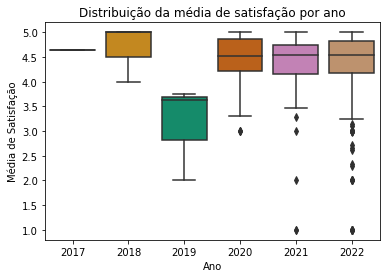

In [ ]:
#Criando o gráfico boxplot com as colunas satisfacao_media_anual e ano
sns.boxplot(x=df['Year'], y=df['satisfacao_media_anual'], palette='colorblind')

#Adicionar rótulos ao eixo x e y
plt.xlabel("Ano")
plt.ylabel("Média de Satisfação")

#Adicionar título ao gráfico
plt.title("Distribuição da média de satisfação por ano")

#Exibir o gráfico
plt.show()

In [ ]:
# Calcular as estatísticas básicas
stats = df.groupby("Year")["satisfacao_media_anual"].describe()

# Calcular o primeiro quartil (Q1)
Q1 = stats["25%"]

# Calcular o terceiro quartil (Q3)
Q3 = stats["75%"]

# Calcular a mediana
mediana = stats["50%"]

# Calcular a amplitude interquartil (IQR)
IQR = Q3 - Q1

# Calcular o valor mínimo
minimo = stats["min"]

# Calcular o valor máximo
maximo = stats["max"]

# Calcular o bigode superior
upper_whisker = Q3 + 1.5 * IQR

# Calcular o bigode inferior
lower_whisker = Q1 - 1.5 * IQR

# Adicionar as estatísticas a uma tabela
stats_table = pd.DataFrame({
    "Mediana": mediana,
    "Média": stats["mean"],
    "Q1": Q1,
    "Q3": Q3,
    "Mínimo": minimo,
    "Máximo": maximo,
    "IQR": IQR,
    "Bigode superior": upper_whisker,
    "Bigode inferior": lower_whisker
})

# Exibir a tabela
print(stats_table)


       Mediana     Média        Q1        Q3    Mínimo    Máximo       IQR  \
Year                                                                         
2017  4.640000  4.640000  4.640000  4.640000  4.640000  4.640000  0.000000   
2018  5.000000  4.697674  4.500000  5.000000  3.988372  5.000000  0.500000   
2019  3.622407  3.127190  2.811203  3.690784  2.000000  3.759162  0.879581   
2020  4.521212  4.401412  4.205727  4.865530  3.000000  5.000000  0.659803   
2021  4.543007  4.361575  4.161667  4.732812  1.000000  5.000000  0.571145   
2022  4.549618  4.341057  4.166667  4.824176  1.000000  5.000000  0.657509   

      Bigode superior  Bigode inferior  
Year                                    
2017         4.640000         4.640000  
2018         5.750000         3.750000  
2019         5.010156         1.491832  
2020         5.855235         3.216022  
2021         5.589529         3.304949  
2022         5.810440         3.180403  


(4844, 14)
   id_servico  porcentagem_digitalizacao  qtd_etapas_digitais  \
0     10942.0                        1.0                  2.0   
1      2520.0                        1.0                  2.0   
2      2523.0                        1.0                  2.0   
3      4786.0                        1.0                  4.0   
4      9667.0                        1.0                  2.0   

                                        servico_nome  \
0                      Declarar meu imposto de renda   
1   Emitir Extrato de Pagamento de Benefício do INSS   
2              Emitir Extrato de Contribuição (CNIS)   
3               Obter a Carteira Digital de Trânsito   
4  Obter o Certificado de Direito à Assistência M...   

                                          orgao_nome  cod_siorg  \
0  Secretaria Especial da Receita Federal do Bras...       77.0   
1         Instituto Nacional do Seguro Social (INSS)     1934.0   
2         Instituto Nacional do Seguro Social (INSS)     193

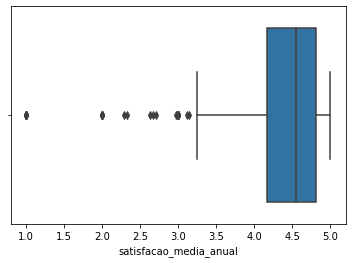

In [ ]:
#Análise Exploratória dos dados
# Verificar o número de linhas e colunas
print(df.shape)

# Verificar as primeiras linhas do dataset
print(df.head())

# Verificar se existem valores ausentes no dataset
print(df.isna().sum())

# Análise de outliers com boxplot
sns.boxplot(data=df, x='satisfacao_media_anual')
plt.show()

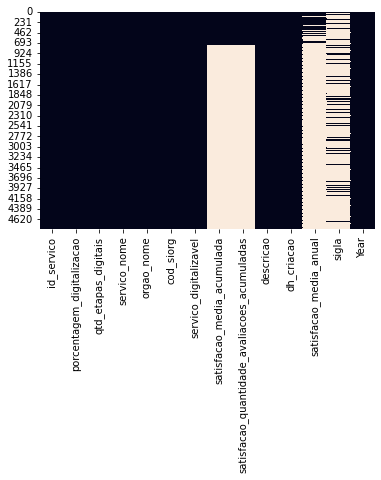

In [ ]:
# Plotando o heatmap
sns.heatmap(df.isnull(), cbar=False)

# Exibindo o gráfico
plt.show()

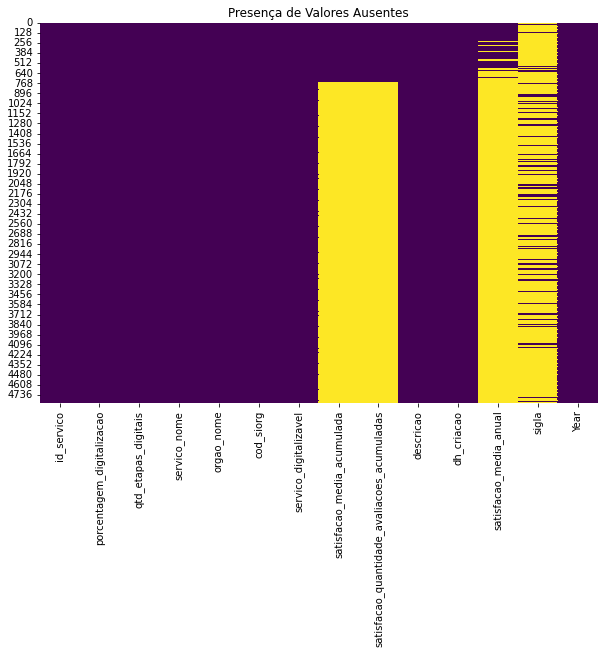

Número de serviços sem informações de satisfação média: 4090


In [ ]:
# Crie um heatmap para mostrar a presença de valores ausentes
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Presença de Valores Ausentes")
plt.show()

# Calcule quantos serviços ainda não possuem informações de satisfação média
missing_satisfacao = df["satisfacao_media_acumulada"].isnull().sum()
print("Número de serviços sem informações de satisfação média:", missing_satisfacao)

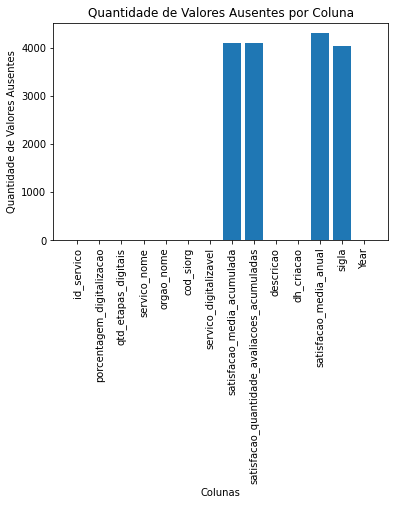

In [ ]:
# Contar o número de entradas vazias para cada coluna
missing_values = df.isnull().sum()

# Criar um gráfico de barras mostrando o número de entradas vazias
plt.bar(x=missing_values.index, height=missing_values)
plt.xlabel("Colunas")
plt.ylabel("Quantidade de Valores Ausentes")
plt.title("Quantidade de Valores Ausentes por Coluna")
plt.xticks(rotation=90)
plt.show()

754
4089


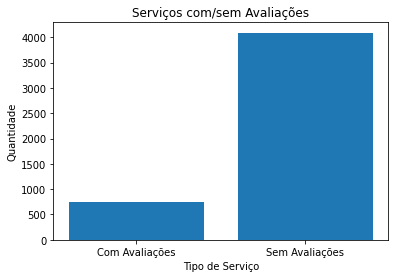

In [ ]:
# Calcular a quantidade total de id_servico
total_servicos = df['id_servico'].count()

# Calcular a quantidade de serviços com satisfacao_media_acumulada
servicos_com_avaliacoes = df['satisfacao_media_acumulada'].count()

# Calcular a quantidade de serviços sem avaliações
servicos_sem_avaliacoes = total_servicos - servicos_com_avaliacoes

# Plotar o gráfico de barras
labels = ['Com Avaliações', 'Sem Avaliações']
values = [servicos_com_avaliacoes, servicos_sem_avaliacoes]
print(servicos_com_avaliacoes)
print(servicos_sem_avaliacoes)

plt.bar(labels, values)
plt.xlabel('Tipo de Serviço')
plt.ylabel('Quantidade')
plt.title('Serviços com/sem Avaliações')

plt.show()

A média de serviços que terão Satisfação preenchida nos próximos anos é: 96.20
Serão necessários 25 anos para todos os serviços terem Satisfação preenchida.


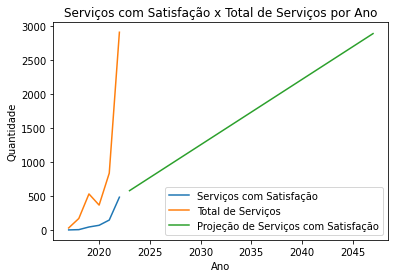

In [ ]:


# Convertendo a coluna 'dh_criacao' para o formato de data
df['dh_criacao'] = pd.to_datetime(df['dh_criacao'])

# Criando uma nova coluna 'ano' com o ano da criação do serviço
df['ano'] = df['dh_criacao'].dt.year

# Selecionando apenas as linhas com satisfacao_media_acumulada preenchida
df_satisfacao = df.dropna(subset=['satisfacao_media_acumulada'])

# Contando quantos serviços com satisfacao_media_acumulada existem por ano
servicos_com_satisfacao = df_satisfacao.groupby('ano')['id_servico'].count()

# Contando quantos serviços existem por ano
total_servicos = df.groupby('ano')['id_servico'].count()

# Calculando a projeção de quantos anos serão necessários para todos os serviços terem satisfação preenchida
media_diff = servicos_com_satisfacao.diff().mean()
anos_necessarios = int(round((total_servicos.values[-1] - servicos_com_satisfacao.values[-1]) / media_diff))

# Criando uma série com a quantidade de serviços que terão satisfação preenchida nos próximos anos
servicos_projetados = pd.Series([servicos_com_satisfacao.values[-1] + i*media_diff for i in range(1, anos_necessarios+1)], index=[servicos_com_satisfacao.index[-1]+i for i in range(1, anos_necessarios+1)])

# Gerando o gráfico
plt.plot(servicos_com_satisfacao.index, servicos_com_satisfacao.values, label='Serviços com Satisfação')
plt.plot(total_servicos.index, total_servicos.values, label='Total de Serviços')
plt.plot(servicos_projetados.index, servicos_projetados.values, label='Projeção de Serviços com Satisfação')
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Serviços com Satisfação x Total de Serviços por Ano')

# Imprimindo a quantidade média de serviços que terão satisfação preenchida nos próximos anos
print(f"A média de serviços que terão Satisfação preenchida nos próximos anos é: {media_diff:.2f}")
print(f"Serão necessários {anos_necessarios} anos para todos os serviços terem Satisfação preenchida.")



   id_servico  porcentagem_digitalizacao  qtd_etapas_digitais  \
0     10942.0                        1.0                  2.0   
1      2520.0                        1.0                  2.0   
2      2523.0                        1.0                  2.0   
3      4786.0                        1.0                  4.0   
4      9667.0                        1.0                  2.0   

                                        servico_nome  \
0                      Declarar meu imposto de renda   
1   Emitir Extrato de Pagamento de Benefício do INSS   
2              Emitir Extrato de Contribuição (CNIS)   
3               Obter a Carteira Digital de Trânsito   
4  Obter o Certificado de Direito à Assistência M...   

                                          orgao_nome  cod_siorg  \
0  Secretaria Especial da Receita Federal do Bras...       77.0   
1         Instituto Nacional do Seguro Social (INSS)     1934.0   
2         Instituto Nacional do Seguro Social (INSS)     1934.0   
3   

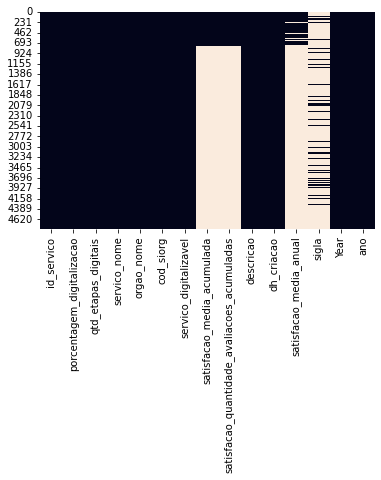

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


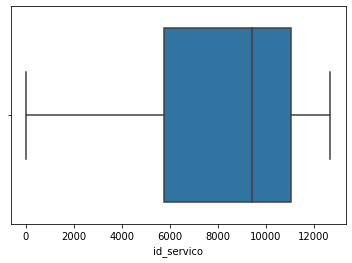

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


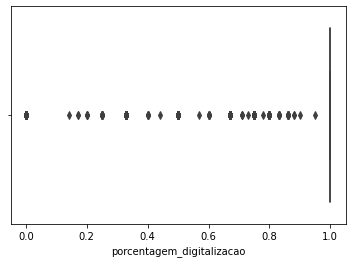

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


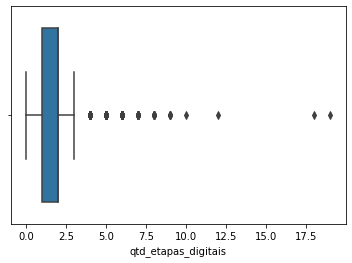

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


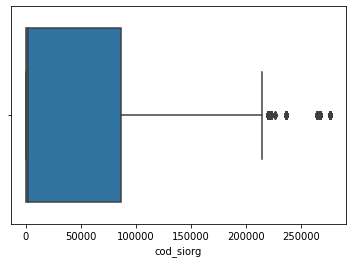

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


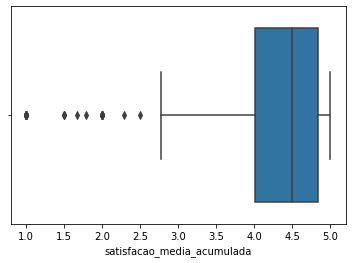

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


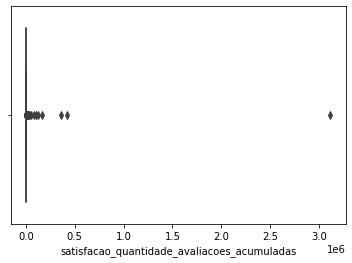

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


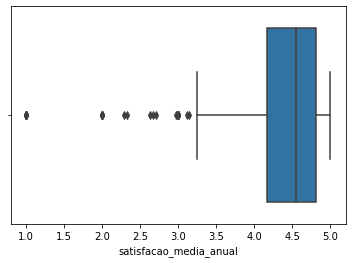

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


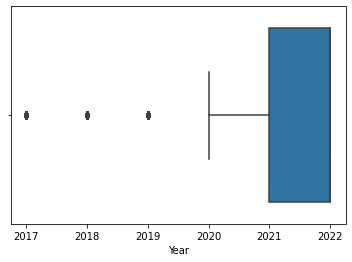

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


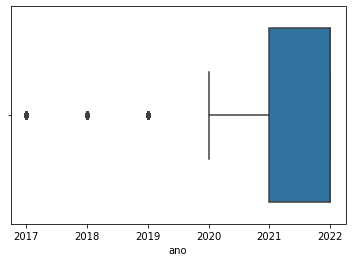

In [ ]:
# Verificação das primeiras linhas do dataframe
print(df.head())

# Verificação do tipo dos dados das colunas
print(df.dtypes)

# Verificação da presença de valores ausentes
print(df.isna().sum())

# Plot de um heatmap para identificar a presença de valores ausentes
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# Verificação da presença de outliers
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
for coluna in colunas_numericas:
    sns.boxplot(df[coluna])
    plt.show()

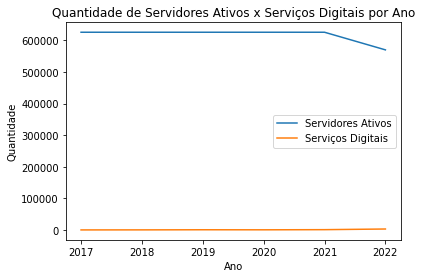

In [ ]:
# Importar os dados da tabela de servidores ativos
servidores_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/servidores_ativos.xlsx')

# Importar os dados da planilha de serviços públicos digitalizados
servicos_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/20220823 Extracao para SIC Compilado.xlsx')

# Converter a coluna 'dh_criacao' para o formato de data
servicos_df['dh_criacao'] = pd.to_datetime(servicos_df['dh_criacao'])

# Criar uma nova coluna 'ano' com o ano da criação do serviço
servicos_df['ano'] = servicos_df['dh_criacao'].dt.year

# Contar a quantidade de serviços digitais por ano
servicos_digitalizados = servicos_df.groupby('ano').size().rename('servicos_digitalizados')

servicos_digitalizados

servidores_df

# Juntar os DataFrames dos servidores ativos e dos serviços digitais por ano
df = pd.merge(servidores_df, servicos_digitalizados, on='ano', how='outer')

# Preencher os valores ausentes com zero
df.fillna(0, inplace=True)

# Criar o gráfico de linha
plt.plot(df['ano'], df['servidores_ativos'], label='Servidores Ativos')
plt.plot(df['ano'], df['servicos_digitalizados'], label='Serviços Digitais')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Quantidade de Servidores Ativos x Serviços Digitais por Ano')
plt.legend()

plt.show()



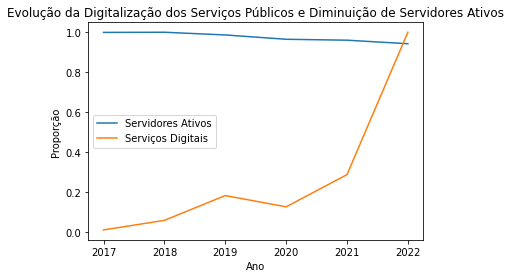

In [ ]:
# Converter a coluna 'dh_criacao' para o formato de data
servicos_df['dh_criacao'] = pd.to_datetime(servicos_df['dh_criacao'])

# Criar uma nova coluna 'ano' com o ano da criação do serviço
servicos_df['ano'] = servicos_df['dh_criacao'].dt.year

# Contar a quantidade de serviços digitais por ano
servicos_digitalizados = servicos_df.groupby('ano').size().rename('servicos_digitalizados')

# Juntar os DataFrames dos servidores ativos e dos serviços digitais por ano
df = pd.merge(servidores_df, servicos_digitalizados, on='ano', how='outer')

# Preencher os valores ausentes com zero
df.fillna(0, inplace=True)

# Normalizar as duas séries de dados para comparar em uma mesma ordem de grandeza
df['servicos_digitalizados'] = df['servicos_digitalizados'] / df['servicos_digitalizados'].max()
df['servidores_ativos'] = df['servidores_ativos'] / df['servidores_ativos'].max()

# Criar o gráfico de linha
plt.plot(df['ano'], df['servidores_ativos'], label='Servidores Ativos')
plt.plot(df['ano'], df['servicos_digitalizados'], label='Serviços Digitais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Evolução da Digitalização dos Serviços Públicos e Diminuição de Servidores Ativos')
plt.legend()

plt.show()

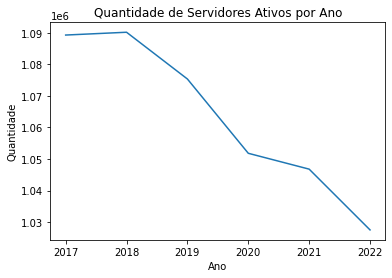

In [ ]:
# Importar os dados da tabela de servidores ativos
servidores_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/servidores_ativos.xlsx')

# Criar o gráfico de linha
plt.plot(servidores_df['ano'], servidores_df['servidores_ativos'])
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Quantidade de Servidores Ativos por Ano')

plt.show()

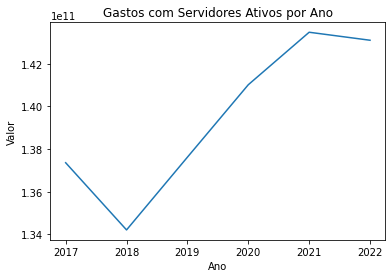

In [ ]:
# Importar os dados da tabela de servidores ativos
gastos_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/gastos_ativos.xlsx')

# Criar o gráfico de linha
plt.plot(gastos_df['ano'], gastos_df['gastos'])
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Gastos com Servidores Ativos por Ano')

plt.show()

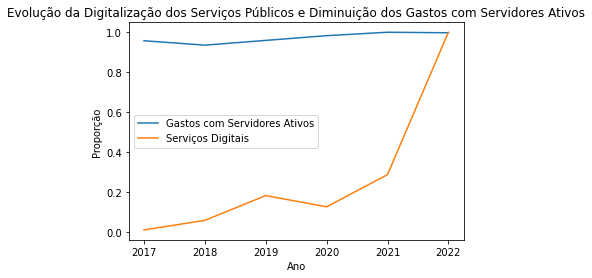

In [ ]:
# Converter a coluna 'dh_criacao' para o formato de data
servicos_df['dh_criacao'] = pd.to_datetime(servicos_df['dh_criacao'])

# Criar uma nova coluna 'ano' com o ano da criação do serviço
servicos_df['ano'] = servicos_df['dh_criacao'].dt.year

# Contar a quantidade de serviços digitais por ano
servicos_digitalizados = servicos_df.groupby('ano').size().rename('servicos_digitalizados')

# Juntar os DataFrames dos servidores ativos e dos serviços digitais por ano
df = pd.merge(gastos_df, servicos_digitalizados, on='ano', how='outer')

# Preencher os valores ausentes com zero
df.fillna(0, inplace=True)

# Normalizar as duas séries de dados para comparar em uma mesma ordem de grandeza
df['servicos_digitalizados'] = df['servicos_digitalizados'] / df['servicos_digitalizados'].max()
df['gastos'] = df['gastos'] / df['gastos'].max()

# Criar o gráfico de linha
plt.plot(df['ano'], df['gastos'], label='Gastos com Servidores Ativos')
plt.plot(df['ano'], df['servicos_digitalizados'], label='Serviços Digitais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Evolução da Digitalização dos Serviços Públicos e Diminuição dos Gastos com Servidores Ativos')
plt.legend()

plt.show()

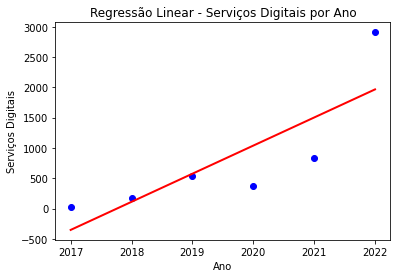

Coeficientes da Regressão Linear:
 [[463.4]]
Coeficiente de Determinação (R²): 0.6601262708496702


In [ ]:
# Importar os dados da planilha de serviços públicos digitalizados
servicos_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/20220823 Extracao para SIC Compilado.xlsx')

# Converter a coluna 'dh_criacao' para o formato de data
servicos_df['dh_criacao'] = pd.to_datetime(servicos_df['dh_criacao'])

# Criar uma nova coluna 'ano' com o ano da criação do serviço
servicos_df['ano'] = servicos_df['dh_criacao'].dt.year

# Contar a quantidade de serviços digitais por ano
servicos_digitalizados = servicos_df.groupby('ano').size().rename('servicos_digitalizados')

# Importar os dados da tabela de servidores ativos
servidores_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/servidores_ativos.xlsx')

# Juntar os DataFrames dos servidores ativos e dos serviços digitais por ano
df = pd.merge(servidores_df, servicos_digitalizados, on='ano', how='outer')

# Preencher os valores ausentes com zero
df.fillna(0, inplace=True)

# Separar as variáveis independentes (x) da variável dependente (y)
x = df[['ano']]
y = df[['servicos_digitalizados']]

# Criar o modelo de regressão linear
reg = LinearRegression().fit(x, y)

# Obter o coeficiente de determinação (R²)
r_squared = reg.score(x, y)

# Gerar o gráfico de dispersão e a linha de regressão
plt.scatter(x, y, color='blue')
plt.plot(x, reg.predict(x), color='red', linewidth=2)
plt.xlabel('Ano')
plt.ylabel('Serviços Digitais')
plt.title('Regressão Linear - Serviços Digitais por Ano')
plt.show()

# Imprimir os coeficientes da regressão linear
print('Coeficientes da Regressão Linear:\n', reg.coef_)
print('Coeficiente de Determinação (R²):', r_squared)

In [ ]:
import numpy as np
# Importar a base de servidores ativos
servidores_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/servidores_ativos.xlsx')

# Separar os dados em variável independente (ano) e variável dependente (servidores ativos)
X = servidores_df[['ano']]
y = servidores_df[['servidores_ativos']]

# Instanciar o modelo de regressão linear
reg = LinearRegression()

# Treinar o modelo
reg.fit(X, y)

# Gerar as previsões para os próximos 10 anos
proximos_anos = np.arange(2024, 2034).reshape(-1, 1)
previsoes = reg.predict(proximos_anos)

# Imprimir as previsões
print('Previsões para os próximos 10 anos:')
for i in range(len(previsoes)):
  print(f'Ano {proximos_anos[i][0]}: {previsoes[i][0]:.0f} servidores ativos')

Previsões para os próximos 10 anos:
Ano 2024: 1004047 servidores ativos
Ano 2025: 990841 servidores ativos
Ano 2026: 977636 servidores ativos
Ano 2027: 964430 servidores ativos
Ano 2028: 951224 servidores ativos
Ano 2029: 938019 servidores ativos
Ano 2030: 924813 servidores ativos
Ano 2031: 911608 servidores ativos
Ano 2032: 898402 servidores ativos
Ano 2033: 885197 servidores ativos


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


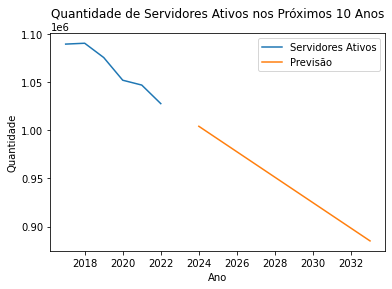

In [ ]:
# Importar os dados da tabela de servidores ativos
servidores_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/servidores_ativos.xlsx')

# Criar o modelo de regressão linear
regressao = LinearRegression()

# Treinar o modelo com os dados existentes
regressao.fit(servidores_df[['ano']], servidores_df['servidores_ativos'])

# Gerar previsões para os próximos 10 anos
previsao_df = pd.DataFrame({'ano': range(2024, 2034)})
previsao_df['servidores_previstos'] = regressao.predict(previsao_df[['ano']])

# Criar o gráfico de linha
plt.plot(servidores_df['ano'], servidores_df['servidores_ativos'], label='Servidores Ativos')
plt.plot(previsao_df['ano'], previsao_df['servidores_previstos'], label='Previsão')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Quantidade de Servidores Ativos nos Próximos 10 Anos')
plt.legend()

plt.show()


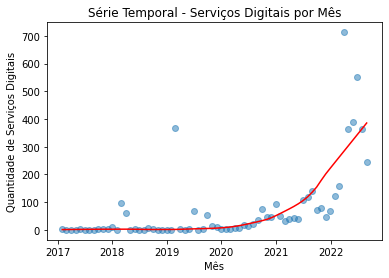

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.nonparametric.smoothers_lowess import lowess

# Carregar o arquivo 'Extracao para SIC Compilado.xlsx'
servicos_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/20220823 Extracao para SIC Compilado.xlsx')

# Converter a coluna 'dh_criacao' para o formato de data
servicos_df['dh_criacao'] = pd.to_datetime(servicos_df['dh_criacao'], format='%Y.%m.%d')

# Agrupar os serviços digitais por mês e contar a quantidade de serviços digitais em cada mês
servicos_por_mes = servicos_df.groupby(pd.Grouper(key='dh_criacao', freq='M')).size().reset_index(name='quantidade_servicos')

# Criar um objeto datetimeindex com os meses e a quantidade de serviços digitais
meses = pd.DatetimeIndex(servicos_por_mes['dh_criacao'])
quantidade_servicos = servicos_por_mes['quantidade_servicos']

# Utilizar o statsmodels para realizar uma regressão não paramétrica e gerar um gráfico com a linha de tendência
lowess_fit = lowess(quantidade_servicos, meses, frac=0.3)
plt.plot(meses, lowess_fit[:, 1], color='red')
plt.scatter(meses, quantidade_servicos, alpha=0.5)
plt.xlabel('Mês')
plt.ylabel('Quantidade de Serviços Digitais')
plt.title('Série Temporal - Serviços Digitais por Mês')
plt.show()


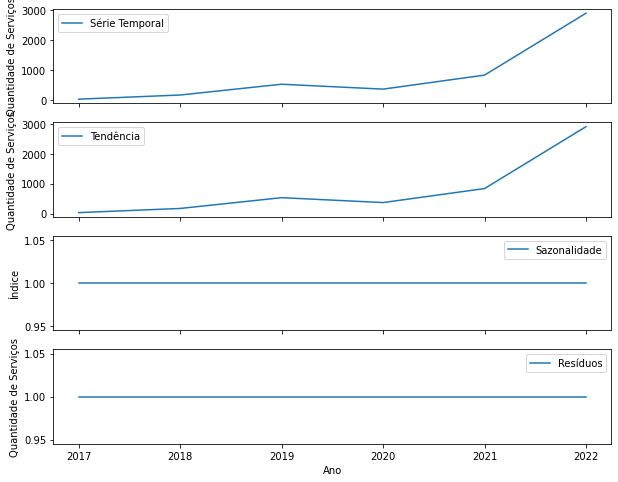

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Importar os dados da planilha de serviços públicos digitalizados
servicos_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/20220823 Extracao para SIC Compilado.xlsx')

# Converter a coluna 'dh_criacao' para o formato de data
servicos_df['dh_criacao'] = pd.to_datetime(servicos_df['dh_criacao'], format='%Y-%m-%d')

# Agrupar os serviços digitais por ano
servicos_por_ano = servicos_df.groupby(servicos_df['dh_criacao'].dt.year).count()

# Selecionar apenas a coluna 'id_servico'
servicos_por_ano = servicos_por_ano[['id_servico']]

# Renomear a coluna para 'y' (o nome esperado pelo Prophet)
servicos_por_ano.rename(columns={'id_servico': 'y'}, inplace=True)

# Decompor a série temporal em tendência, sazonalidade e resíduos
decomposicao = seasonal_decompose(servicos_por_ano, model='multiplicative', period=1)


# Gerar os gráficos da série temporal, da tendência, da sazonalidade e dos resíduos
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8), sharex=True)
ax[0].plot(servicos_por_ano.index, servicos_por_ano['y'], label='Série Temporal')
ax[0].set_ylabel('Quantidade de Serviços')
ax[0].legend(loc='best')
ax[1].plot(decomposicao.trend.index, decomposicao.trend.values, label='Tendência')
ax[1].set_ylabel('Quantidade de Serviços')
ax[1].legend(loc='best')
ax[2].plot(decomposicao.seasonal.index, decomposicao.seasonal.values, label='Sazonalidade')
ax[2].set_ylabel('Índice')
ax[2].legend(loc='best')
ax[3].plot(decomposicao.resid.index, decomposicao.resid.values, label='Resíduos')
ax[3].set_ylabel('Quantidade de Serviços')
ax[3].legend(loc='best')
plt.xlabel('Ano')
plt.show()


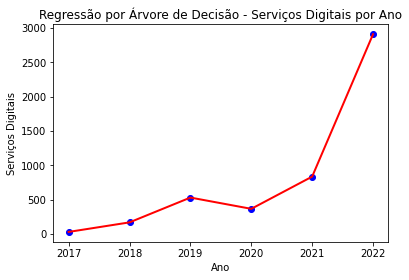

Coeficientes da Regressão por Árvore de Decisão:
 [ 0  0  0 -2 -2  0  0 -2 -2 -2 -2]
Coeficiente de Determinação (R²): 1.0


In [ ]:
# Importar os dados da planilha de serviços públicos digitalizados
servicos_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/20220823 Extracao para SIC Compilado.xlsx')

# Converter a coluna 'dh_criacao' para o formato de data
servicos_df['dh_criacao'] = pd.to_datetime(servicos_df['dh_criacao'])

# Criar uma nova coluna 'ano' com o ano da criação do serviço
servicos_df['ano'] = servicos_df['dh_criacao'].dt.year

# Contar a quantidade de serviços digitais por ano
servicos_digitalizados = servicos_df.groupby('ano').size().rename('servicos_digitalizados')

# Importar os dados da tabela de servidores ativos
servidores_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/servidores_ativos.xlsx')

# Juntar os DataFrames dos servidores ativos e dos serviços digitais por ano
df = pd.merge(servidores_df, servicos_digitalizados, on='ano', how='outer')

# Preencher os valores ausentes com zero
df.fillna(0, inplace=True)

# Separar as variáveis independentes (x) da variável dependente (y)
x = df[['ano']]
y = df[['servicos_digitalizados']]

# Criar o modelo de regressão por árvore de decisão
reg = DecisionTreeRegressor(random_state=0).fit(x, y)

# Obter o coeficiente de determinação (R²)
r_squared = reg.score(x, y)

# Gerar o gráfico de dispersão e a linha de regressão
plt.scatter(x, y, color='blue')
plt.plot(x, reg.predict(x), color='red', linewidth=2)
plt.xlabel('Ano')
plt.ylabel('Serviços Digitais')
plt.title('Regressão por Árvore de Decisão - Serviços Digitais por Ano')
plt.show()

# Imprimir os coeficientes da regressão por árvore de decisão
print('Coeficientes da Regressão por Árvore de Decisão:\n', reg.tree_.feature)
print('Coeficiente de Determinação (R²):', r_squared)


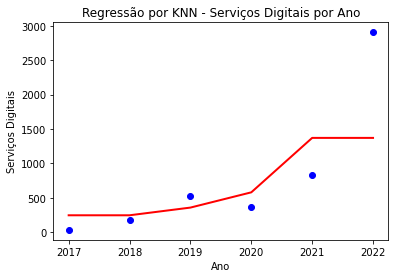

Coeficiente de Determinação (R²): 0.5123770355169568


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Importar os dados da planilha de serviços públicos digitalizados
servicos_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/20220823 Extracao para SIC Compilado.xlsx')

# Converter a coluna 'dh_criacao' para o formato de data
servicos_df['dh_criacao'] = pd.to_datetime(servicos_df['dh_criacao'])

# Criar uma nova coluna 'ano' com o ano da criação do serviço
servicos_df['ano'] = servicos_df['dh_criacao'].dt.year

# Contar a quantidade de serviços digitais por ano
servicos_digitalizados = servicos_df.groupby('ano').size().rename('servicos_digitalizados')

# Importar os dados da tabela de servidores ativos
servidores_df = pd.read_excel('/content/drive/MyDrive/MBA USP/TCC/servidores_ativos.xlsx')

# Juntar os DataFrames dos servidores ativos e dos serviços digitais por ano
df = pd.merge(servidores_df, servicos_digitalizados, on='ano', how='outer')

# Preencher os valores ausentes com zero
df.fillna(0, inplace=True)

# Separar as variáveis independentes (x) da variável dependente (y)
x = df[['ano']]
y = df[['servicos_digitalizados']]

# Criar o modelo de regressão por KNN
reg = KNeighborsRegressor(n_neighbors=3).fit(x, y)

# Obter o coeficiente de determinação (R²)
r_squared = reg.score(x, y)

# Gerar o gráfico de dispersão e a linha de regressão
plt.scatter(x, y, color='blue')
plt.plot(x, reg.predict(x), color='red', linewidth=2)
plt.xlabel('Ano')
plt.ylabel('Serviços Digitais')
plt.title('Regressão por KNN - Serviços Digitais por Ano')
plt.show()

# Imprimir o coeficiente de determinação (R²)
print('Coeficiente de Determinação (R²):', r_squared)